# Charge Conjugation Exploration
#### The next 3 cells are imports and functions the code will need. Skip this.

In [1]:
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import ROOT


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
def make_kkpi_histos(df_pipkmks, df_pimkpks, filter, nbins_kkpi=40, xmin_kkpi=1.1, xmax_kkpi=1.5):
    hist_pipkmks = df_pipkmks.Histo1D((f'pipkmks_{filter}', f'pipkmks_{filter}', nbins_kkpi, xmin_kkpi, xmax_kkpi), 'pipkmks_m')
    hist_pimkpks = df_pimkpks.Histo1D((f'pimkpks_{filter}', f'pimkpks_{filter}', nbins_kkpi, xmin_kkpi, xmax_kkpi), 'pimkpks_m')
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetTitle(f'M(KK#pi) for {filter}')
    hist_pipkmks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    hist_pipkmks.GetYaxis().SetTitle('Counts/10MeV')
    hist_pimkpks.SetTitle(f'M(KK#pi) for {filter} ')
    hist_pimkpks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    return hist_pipkmks.GetValue(), hist_pimkpks.GetValue()


def make_2d_kkpi_histos(df_pipkmks, df_pimkpks, quantity, nbins_quantity, xmin_quantity, xmax_quantity, nbins_kkpi=40, xmin_kkpi=1.1, xmax_kkpi=1.5):
    quantity_dict = {
        'mx2_all': ('mx2_ppipkmks', 'mx2_ppimkpks', 'MX^{2}(pKK#pi) [GeV^{2}]'),
        'ks_pl': ('pathlength_sig', 'pathlength_sig', 'K_{s} pathlength [cm]'),
        'ks_m_cut': ('ks_m', 'ks_m', 'K_{s} mass [GeV]'),
        'pp': ('p_p', 'p_p', 'P(p) [GeV]'),
        'ppi': ('ppip_m', 'ppim_m', 'M(p#pi) [GeV]'),
        'kp': ('kmp_m', 'ksp_m', 'M(pK) [GeV]'),
        'kp_mirror': ('ksp_m', 'kpp_m', 'M(pK) [GeV]'),
        'kstar_charged': ('kspip_m', 'kspim_m', 'M(K^{* #pm}) [GeV]'),
        'kstar_neutral': ('kmpip_m', 'kppim_m', 'M(K^{* 0}) [GeV]')
    }
    hist_pipkmks_2d = df_pipkmks.Histo2D((f'pipkmks_{quantity}', f'pipkmks_{quantity}', nbins_kkpi, xmin_kkpi, xmax_kkpi, nbins_quantity, xmin_quantity, xmax_quantity), 'pipkmks_m', quantity_dict[quantity][0])
    hist_pimkpks_2d = df_pimkpks.Histo2D((f'pimkpks_{quantity}', f'pimkpks_{quantity}', nbins_kkpi, xmin_kkpi, xmax_kkpi, nbins_quantity, xmin_quantity, xmax_quantity), 'pimkpks_m', quantity_dict[quantity][1])
    hist_pipkmks_2d.SetTitle(f'{quantity_dict[quantity][2]}' + ' vs M(#pi^{+}K^{-}K_{s})')
    hist_pipkmks_2d.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
    hist_pipkmks_2d.GetYaxis().SetTitle(quantity_dict[quantity][2])
    hist_pimkpks_2d.SetTitle(f'{quantity_dict[quantity][2]}' + ' vs M(#pi^{-}K^{+}K_{s})')
    hist_pimkpks_2d.GetXaxis().SetTitle('M(#pi^{-}K^{+}K_{s}) [GeV]')
    hist_pimkpks_2d.GetYaxis().SetTitle(quantity_dict[quantity][2])
    return hist_pipkmks_2d.GetValue(), hist_pimkpks_2d.GetValue()



def build_legend(hist_pipkmks, hist_pimkpks):
    leg = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
    leg.AddEntry(hist_pipkmks, 'K^{-}K_{s}#pi^{+}', 'l')
    leg.AddEntry(hist_pimkpks, 'K^{+}K_{s}#pi^{-}', 'l')
    return leg

## The Cell below sets up the directory the files will be saved in, what type of data will be plotted, and which run period it will run over

#### Data types are "signal" and "data" for signal MC and real data
#### run periods are "spring", "fall", and "2017"


In [4]:
plot_path = '/work/halld/home/viducic/plots/acceptance_study'
data_type = 'data'
run_period = 'fall'

In [5]:
df_pipkmks = ct.get_dataframe('pipkmks', run_period, data_type, filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', run_period, data_type, filtered=False)
c = ROOT.TCanvas("c", "c", 1000, 1000)
c1 = ROOT.TCanvas("c1", "c1", 1000, 1000)
c1.Divide(2, 1)

In [6]:
n_flattened_pipkmks = df_pipkmks.Count().GetValue()
n_flattened_pimkpks = df_pimkpks.Count().GetValue()
print(f"N(flat) for {run_period} pi+K-: {n_flattened_pipkmks}")
print(f"N(flat) for {run_period} pi-K+: {n_flattened_pimkpks}")

N(flat) for fall pi+K-: 11538949
N(flat) for fall pi-K+: 10359007


### All plots will be in the region of $1.1 < M(KK\pi) < 1.5 GeV$

In [7]:
df_pipkmks = df_pipkmks.Filter('pipkmks_m >= 1.1 && pipkmks_m <= 1.5')
df_pimkpks = df_pimkpks.Filter('pimkpks_m >= 1.1 && pimkpks_m <= 1.5')

In [8]:
n_uncut_pipkmks = df_pipkmks.Count().GetValue()
n_uncut_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_uncut, hist_pimkpks_uncut = make_kkpi_histos(df_pipkmks, df_pimkpks, 'uncut')

uncut pipkmks: 534272 || uncut pimkpks: 527767


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_uncut.png has been created


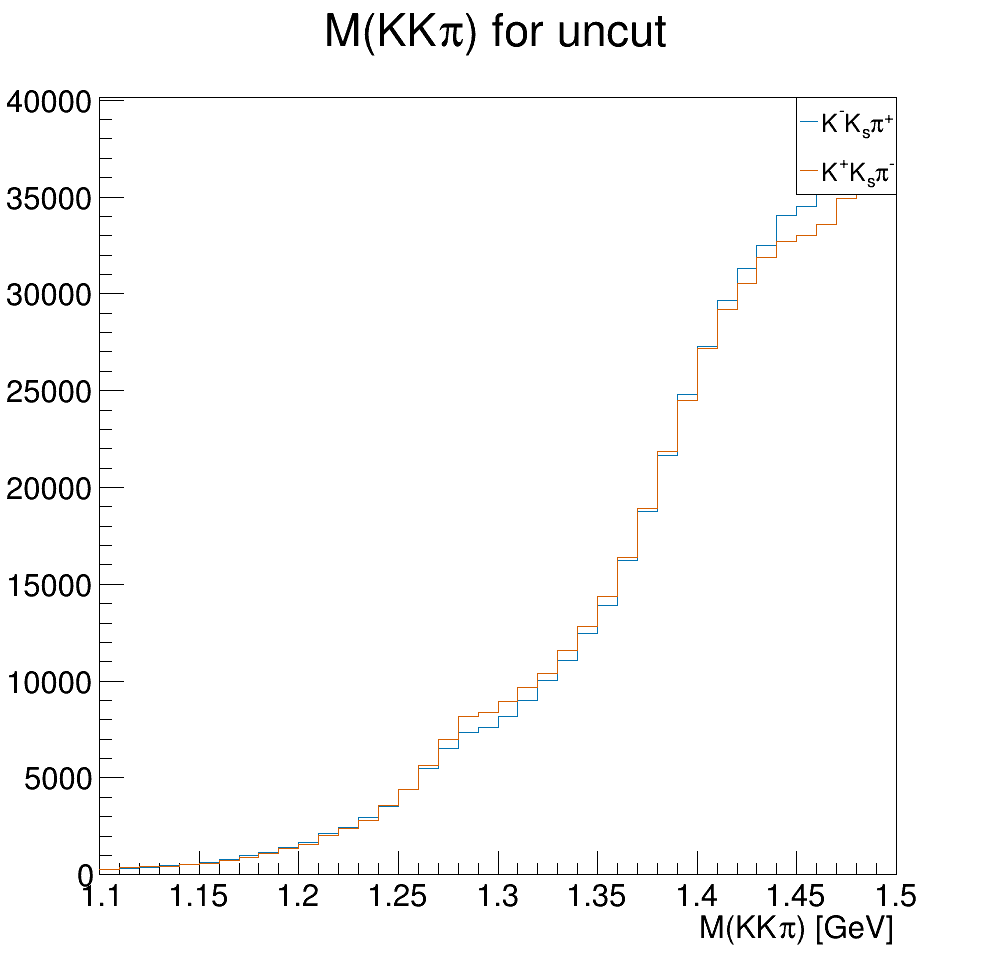

In [9]:
print(f'uncut pipkmks: {n_uncut_pipkmks} || uncut pimkpks: {n_uncut_pimkpks}')
c.cd()
hist_pipkmks_uncut.Draw()
hist_pimkpks_uncut.Draw('same')
legend = build_legend(hist_pipkmks_uncut, hist_pimkpks_uncut)
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_uncut.png')


## $MX^2(pKK\pi)$ Selection
#### Cut is $|MX^2(pKK\pi)| < 0.01 GeV$

In [10]:
hist_pipkmks_vs_mx2all, hist_pimkpks_vs_mx2all = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'mx2_all', 100, -0.05, 0.05)

In [11]:
df_pipkmks = df_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.MX2_PPIMKPKS_CUT)
n_mx2all_pipkmks = df_pipkmks.Count().GetValue()
n_mx2all_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_mx2all, hist_pimkpks_mx2all = make_kkpi_histos(df_pipkmks, df_pimkpks, 'mx2all')

mx2 all cut pipkmks: 397743 || pimkpks: 396288
mx2 all efficiency pipkmks: 0.7444578791327264 || pimkpks: 0.7508768073790139


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_mx2all.png has been created


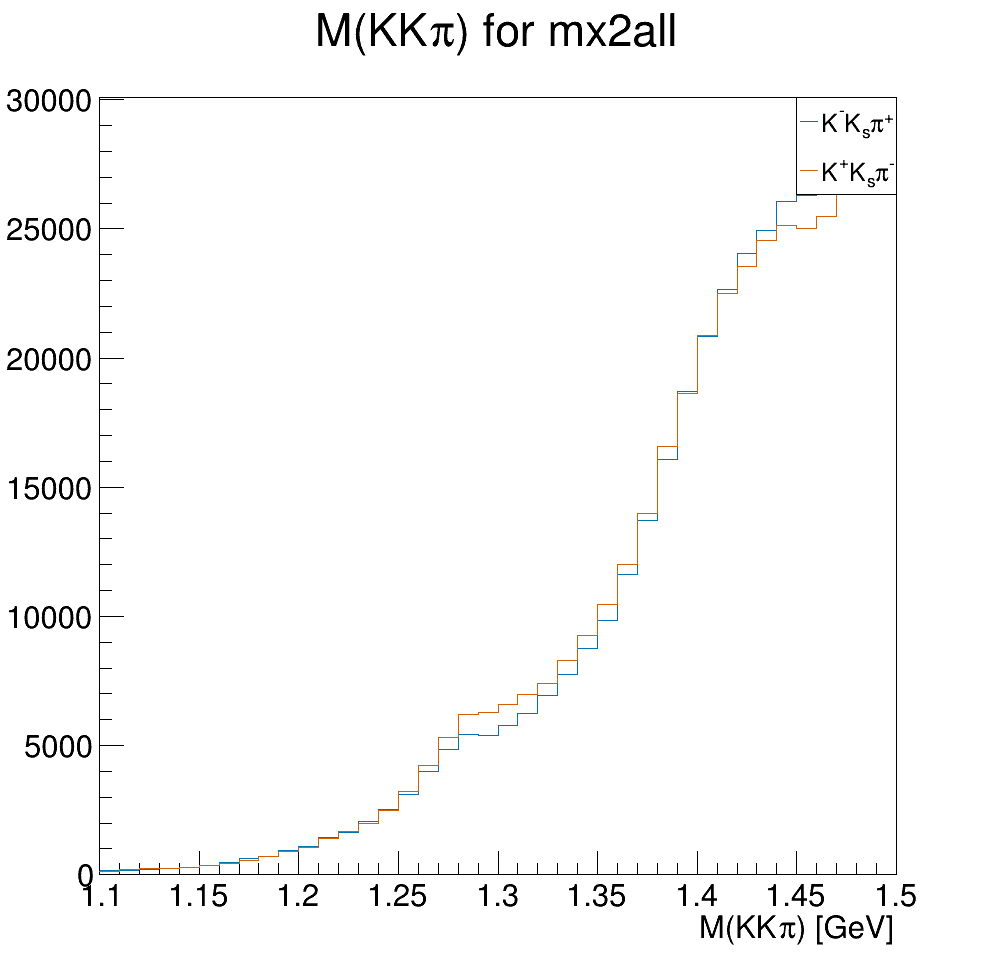

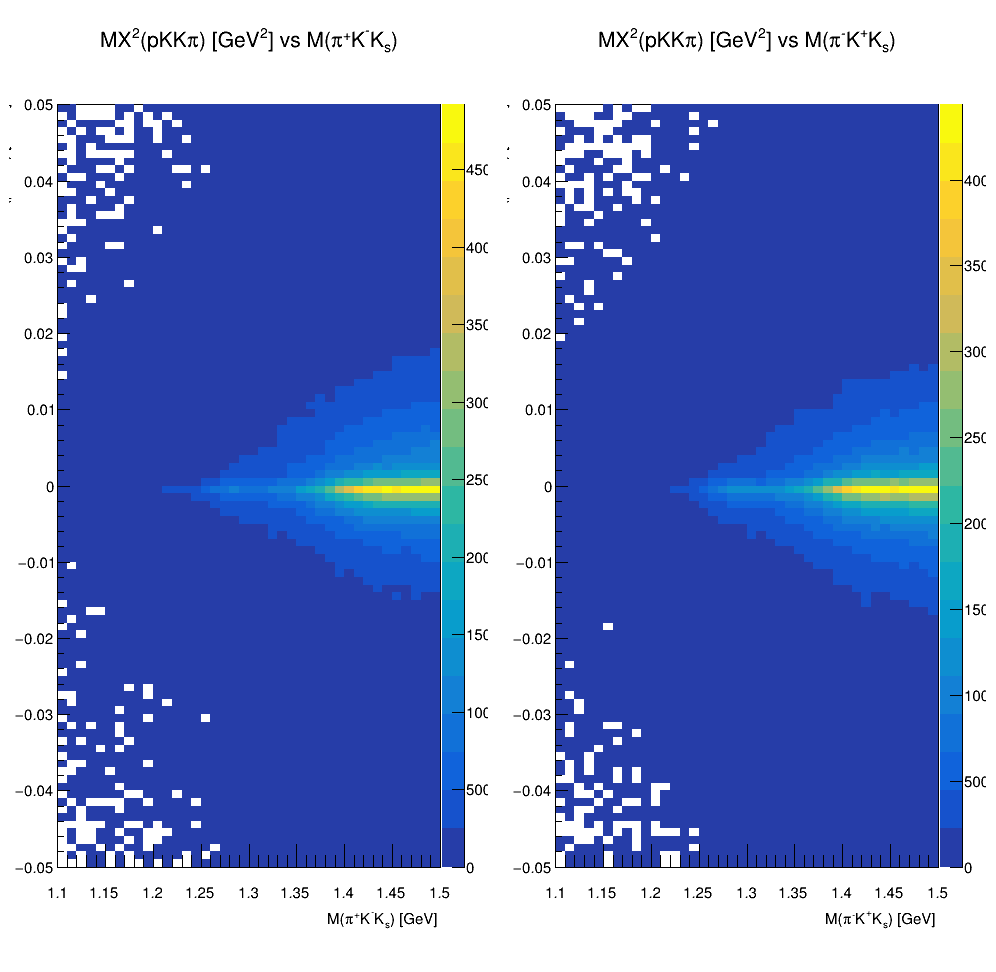

In [12]:
print(f'mx2 all cut pipkmks: {n_mx2all_pipkmks} || pimkpks: {n_mx2all_pimkpks}')
print(f'mx2 all efficiency pipkmks: {n_mx2all_pipkmks/n_uncut_pipkmks} || pimkpks: {n_mx2all_pimkpks/n_uncut_pimkpks}')
c.cd()
hist_pipkmks_mx2all.Draw()
hist_pimkpks_mx2all.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_mx2all.png')
c1.cd(1)
hist_pipkmks_vs_mx2all.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_mx2all.Draw('colz')
c1.Draw()


## $K_s \textrm{ Pathlength Signifigance}$ Selection
#### Cut: $K_s(PL) > 5$

In [13]:
hist_pipkmks_vs_kspl, hist_pimkpks_vs_kspl = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'ks_pl', 100, 0, 10)

In [14]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_PATHLENGTH_CUT)
n_kspl_pipkmks = df_pipkmks.Count().GetValue()
n_kspl_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kspl, hist_pimkpks_kspl = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kspl')



palthlength filtered pipkmks: 151590 || pathlength filtered pimkpks: 146568
cut efficiency pipkmks = 0.38112550063734624 || cut efficiency pimkpks = 0.36985222868217055


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_kspl.png has been created


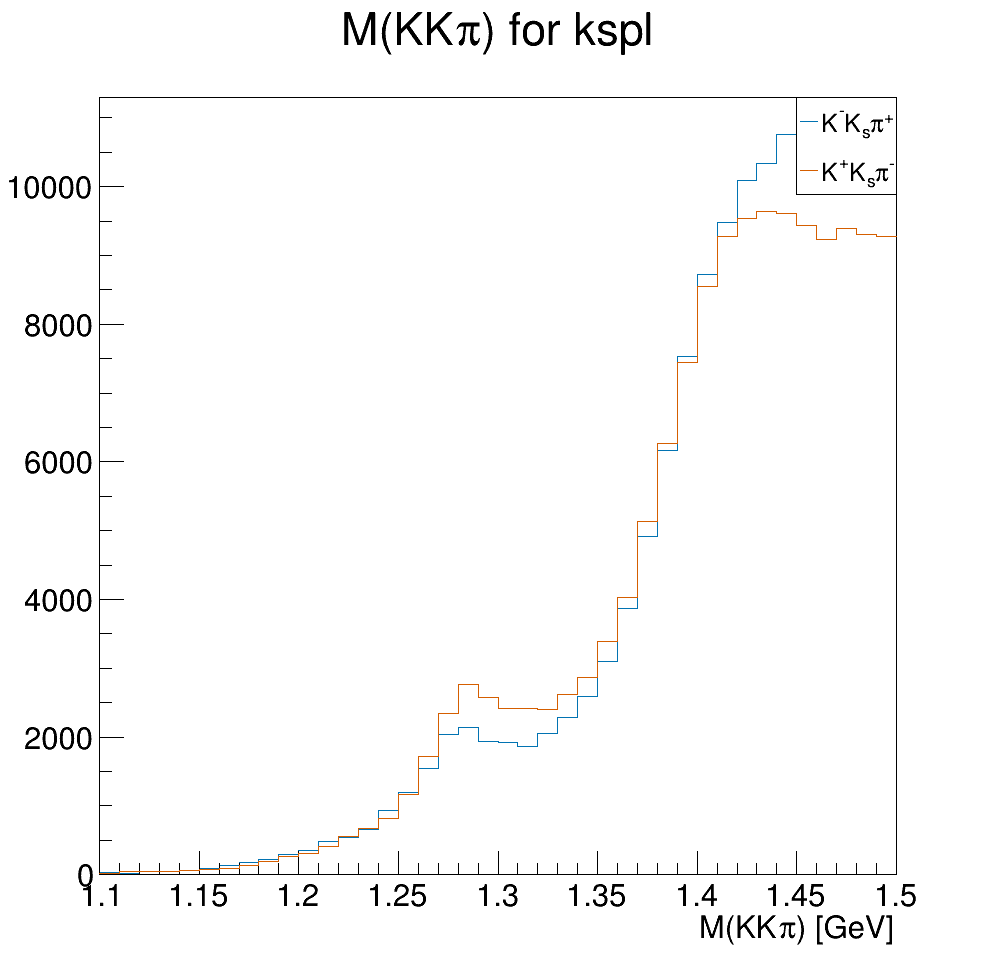

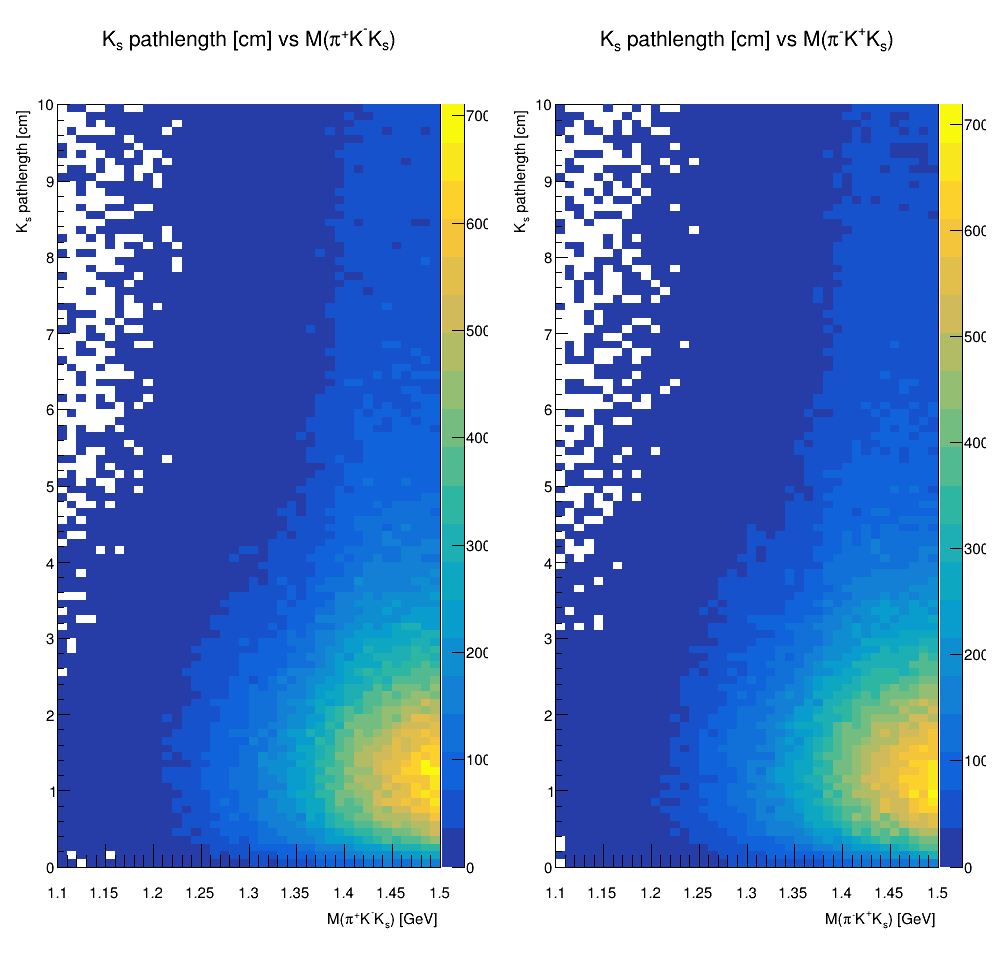

In [15]:
print(f'palthlength filtered pipkmks: {n_kspl_pipkmks} || pathlength filtered pimkpks: {n_kspl_pimkpks}')
print(f'cut efficiency pipkmks = {n_kspl_pipkmks/n_mx2all_pipkmks} || cut efficiency pimkpks = {n_kspl_pimkpks/n_mx2all_pimkpks}')
c.cd()
hist_pipkmks_kspl.Draw()
hist_pimkpks_kspl.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_kspl.png')
c1.cd(1)
hist_pipkmks_vs_kspl.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_kspl.Draw('colz')
c1.Draw()


## $M(K_s)$ Selection
### Cut $|M(\pi^+\pi^-) - 0.4971| < 0.0207$ 
2 sigma around the mean of the fit ks distribution

In [16]:
hist_pipkmks_vs_ksm, hist_pimkpks_vs_ksm = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'ks_m_cut', 100, 0.3, 0.7)

In [17]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_MASS_CUT)
n_ksm_pipkmks = df_pipkmks.Count().GetValue()
n_ksm_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ksm, hist_pimkpks_ksm = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ks_m_cut')

kshort mass cut pipkmks: 134493 || kshort mass cut pimkpks: 129582
kshort mass cut efficiency pipkmks: 0.8872155155353255 || pimkpks 0.8841084001964958


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_ksmass.png has been created


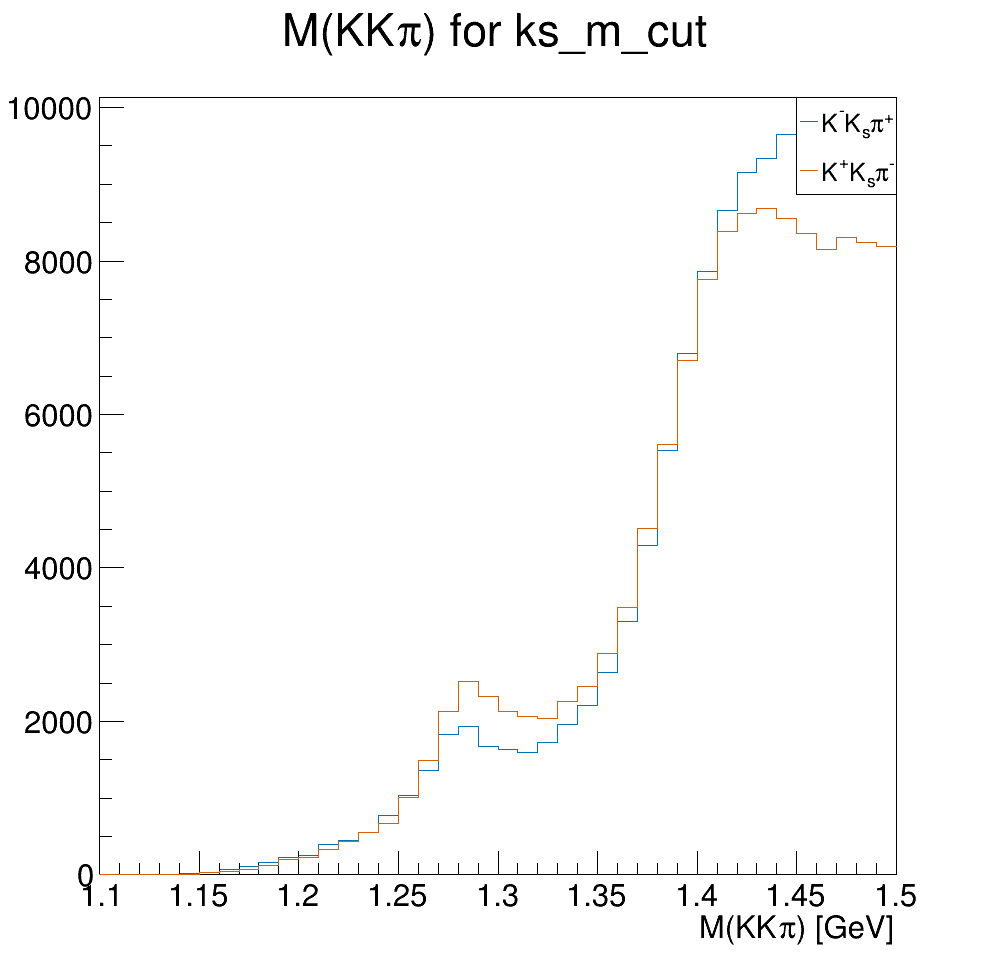

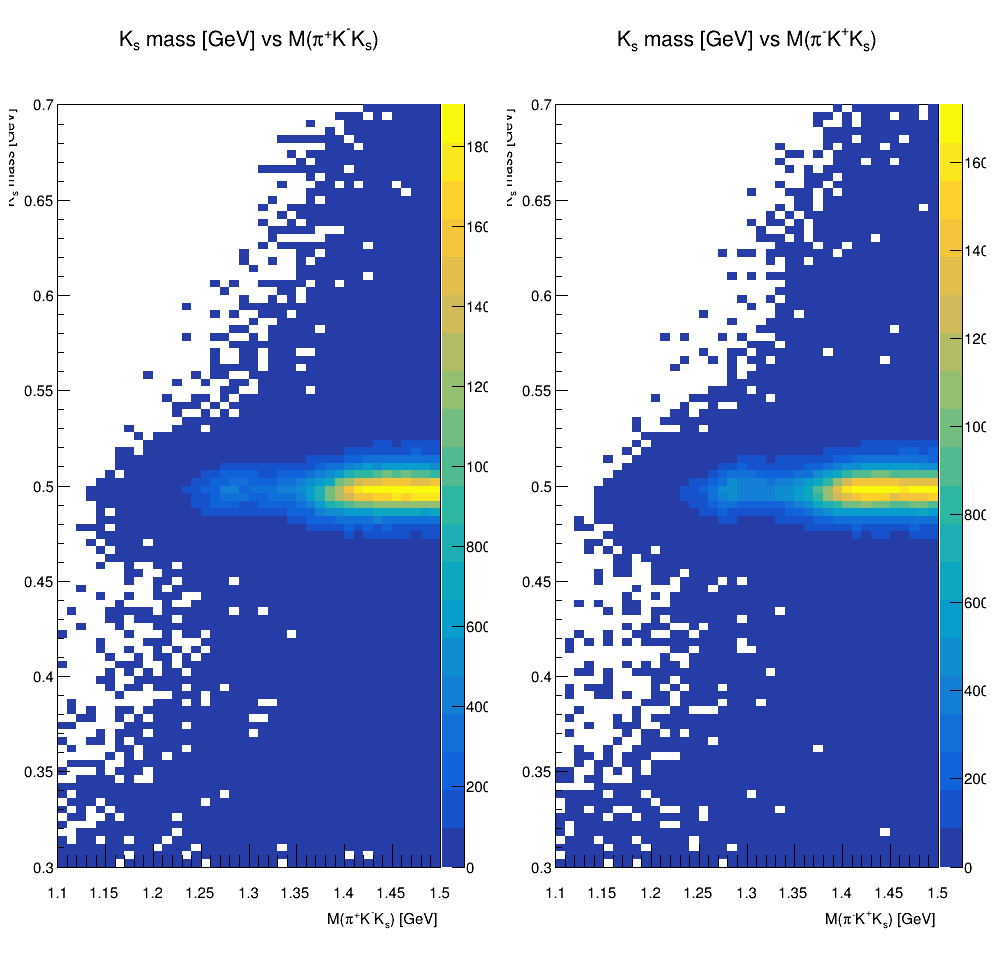

In [18]:
print(f'kshort mass cut pipkmks: {n_ksm_pipkmks} || kshort mass cut pimkpks: {n_ksm_pimkpks}')
print(f'kshort mass cut efficiency pipkmks: {n_ksm_pipkmks / n_kspl_pipkmks} || pimkpks {n_ksm_pimkpks / n_kspl_pimkpks}')
c.cd()
hist_pipkmks_ksm.Draw()
hist_pimkpks_ksm.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_ksmass.png')
c1.cd(1)
hist_pipkmks_vs_ksm.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_ksm.Draw('colz')
c1.Draw()

## Proton Momentum Selection
#### $\vec{P}(p) > 0.4$ GeV

In [19]:
hist_pipkmks_vs_pp, hist_pimkpks_vs_pp = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'pp', 200, 0.2, 2)

In [20]:
df_pipkmks = df_pipkmks.Filter(kcuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.P_P_CUT)
n_pp_pipkmks = df_pipkmks.Count().GetValue()
n_pp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_pp, hist_pimkpks_pp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'pp')

proton momentum cut pipkmks: 114112 || pimkpks: 109062
proton momentum cut efficiency pipkmks: 0.8484605146736262 || pimkpks: 0.8416446728712321


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_pp.png has been created


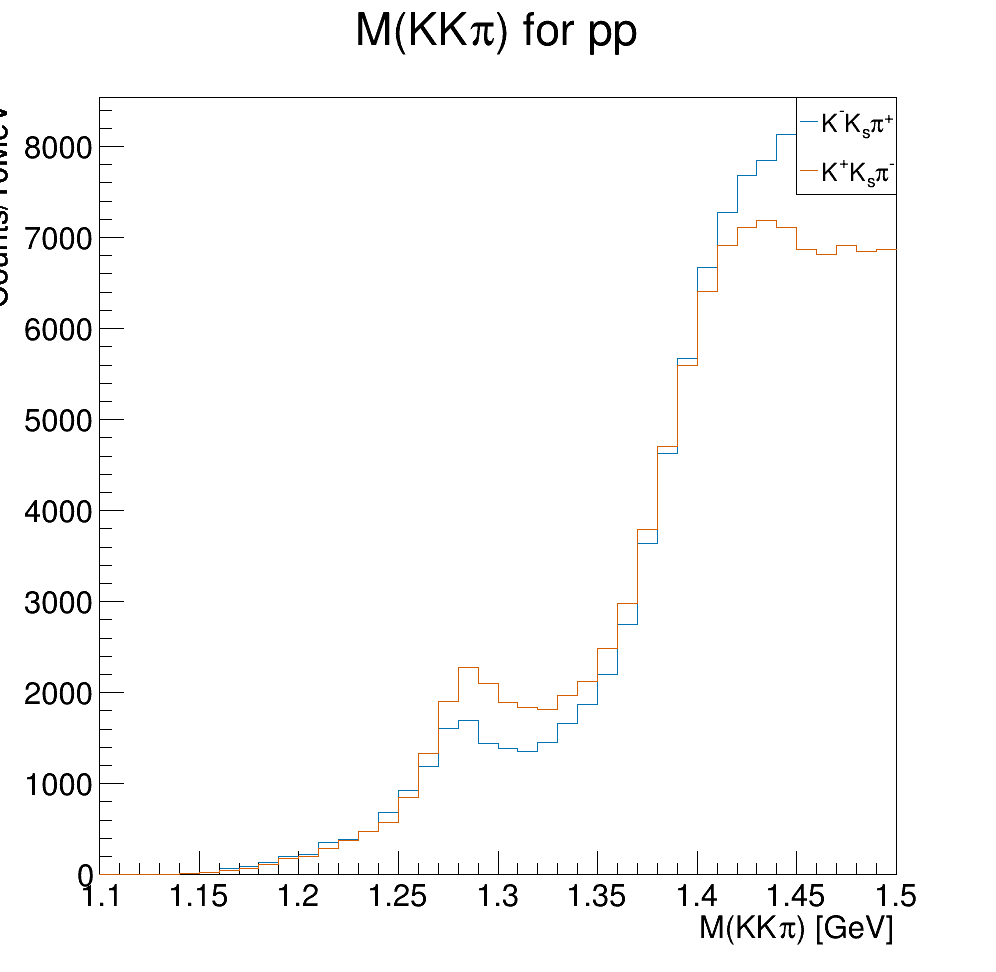

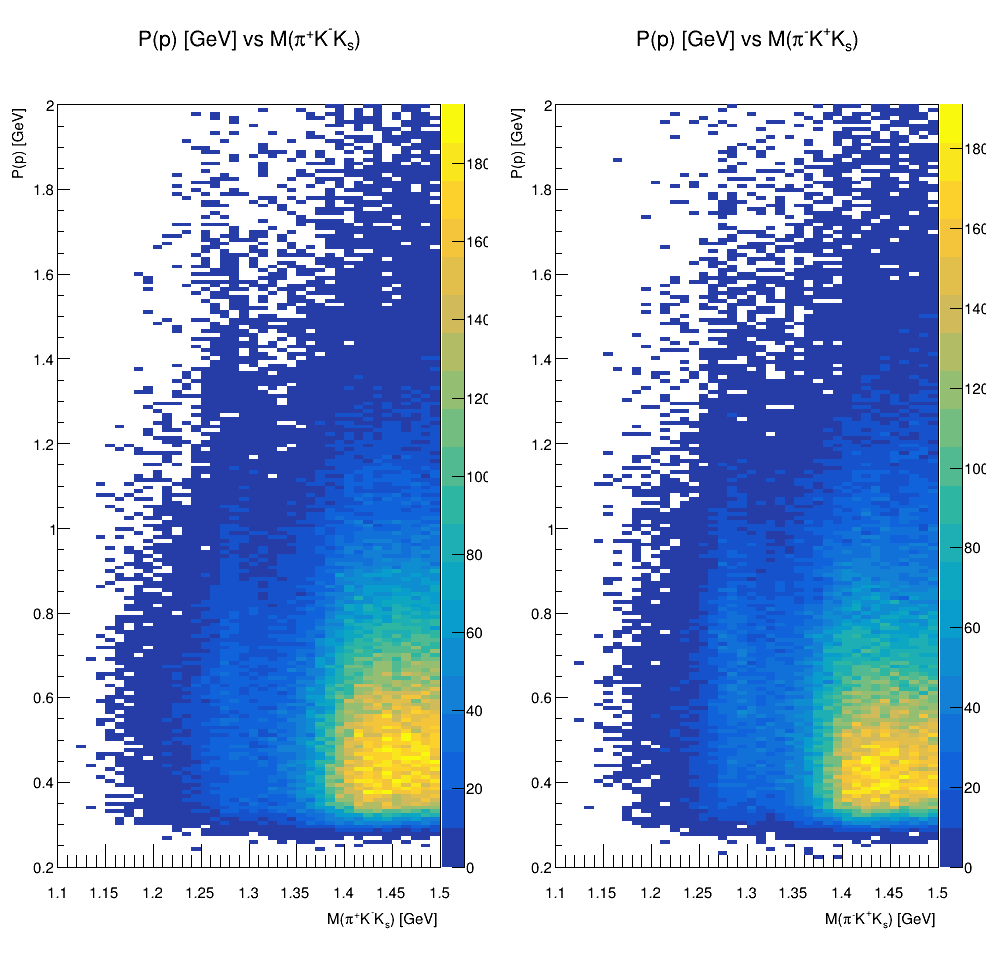

In [21]:
print(f'proton momentum cut pipkmks: {n_pp_pipkmks} || pimkpks: {n_pp_pimkpks}')
print(f'proton momentum cut efficiency pipkmks: {n_pp_pipkmks/n_ksm_pipkmks} || pimkpks: {n_pp_pimkpks/n_ksm_pimkpks}')
c.cd()
hist_pipkmks_pp.Draw()
hist_pimkpks_pp.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_pp.png')
c1.cd(1)
hist_pipkmks_vs_pp.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_pp.Draw('colz')
c1.Draw()

## $\Delta / N^* Rejection$
### $M(p\pi) > 1.4$ GeV

In [22]:
hist_pipkmks_vs_ppi, hist_pimkpks_vs_ppi = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'ppi', 200, 1.0, 3)

In [23]:
df_pipkmks = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT)
n_ppi_pipkmks = df_pipkmks.Count().GetValue()
n_ppi_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ppi, hist_pimkpks_ppi = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ppi')

n ppi cut pipkmks: 100186 || pimkpks: 94837
ppi cut efficicnecy pipkmks: 0.87796200224341 || pimkpks: 0.8695696026113586


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_delta_nstar.png has been created


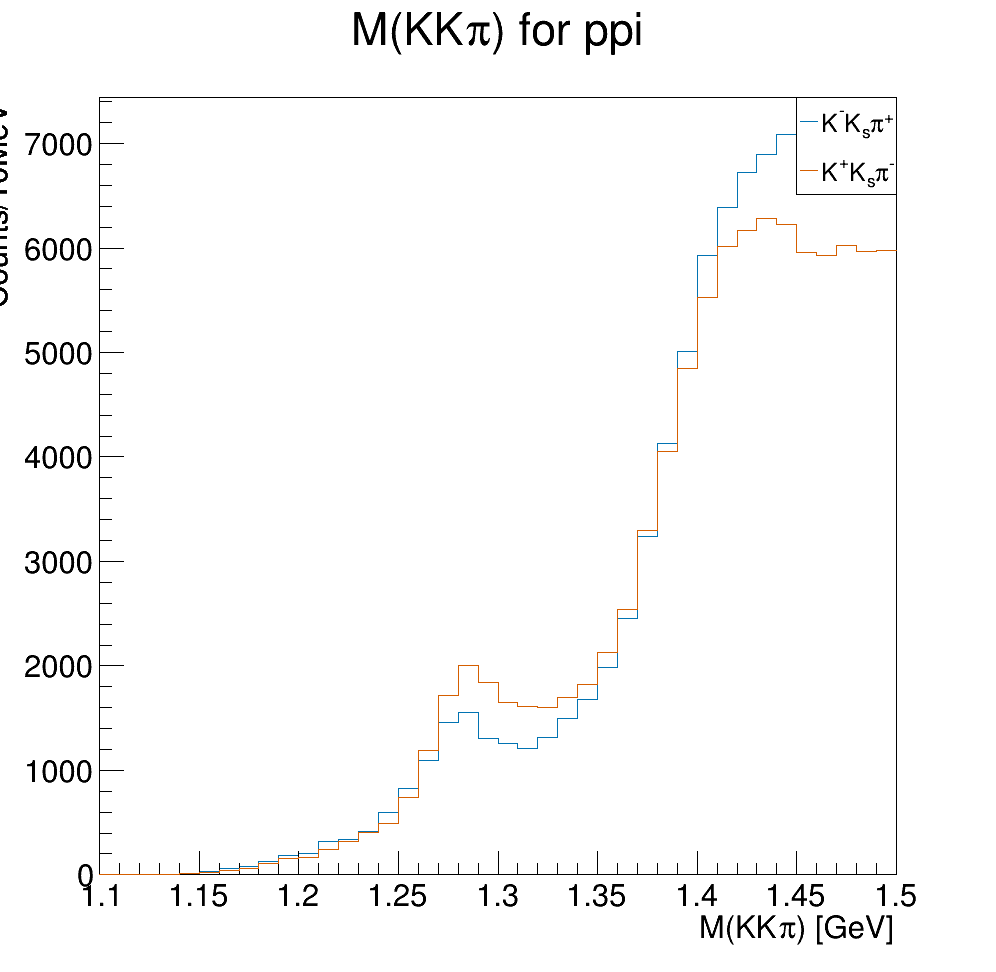

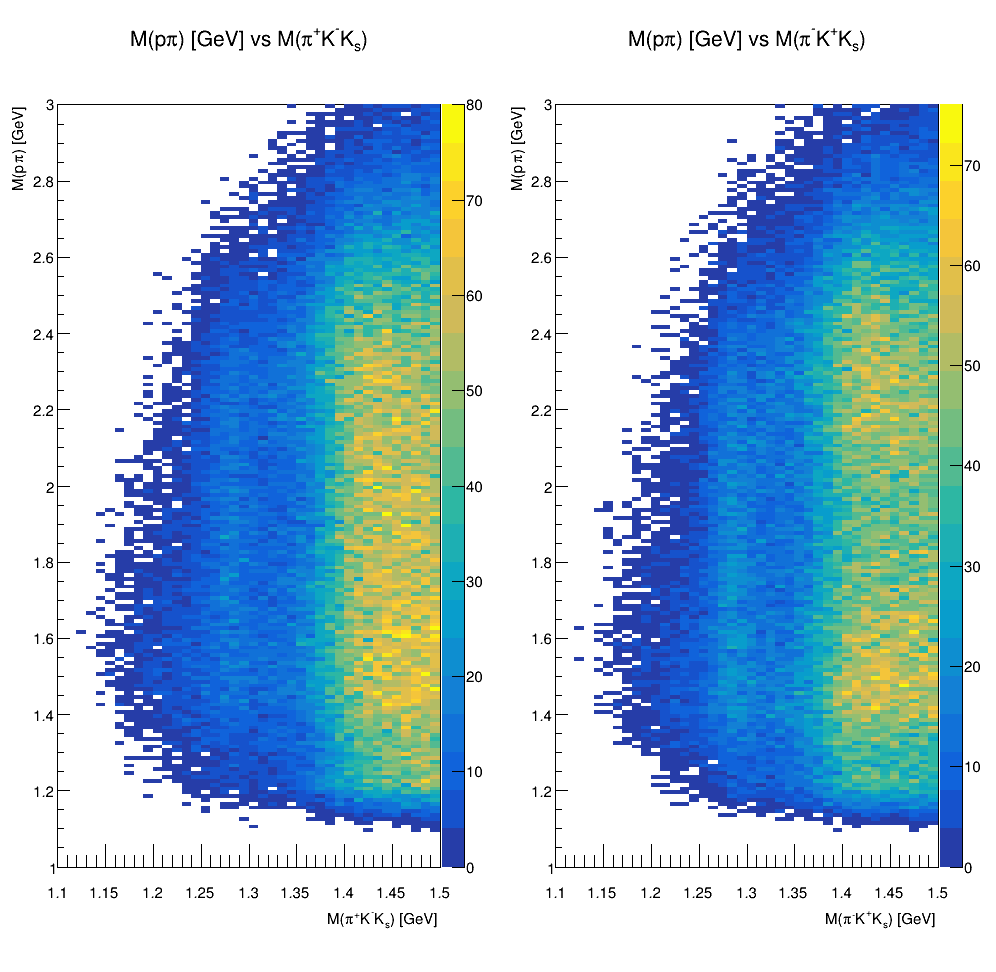

In [24]:
print(f'n ppi cut pipkmks: {n_ppi_pipkmks} || pimkpks: {n_ppi_pimkpks}')
print(f'ppi cut efficicnecy pipkmks: {n_ppi_pipkmks / n_pp_pipkmks} || pimkpks: {n_ppi_pimkpks / n_pp_pimkpks}')
c.cd()
hist_pipkmks_ppi.Draw()
hist_pimkpks_ppi.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_delta_nstar.png')
c1.cd(1)
hist_pipkmks_vs_ppi.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_ppi.Draw('colz')
c1.Draw()

## $\Lambda$ Rejection
### $M(Kp) > 1.9$ GeV 
This is the "mirrored" cut

In [25]:
hist_pipkmks_vs_kp, hist_pimkpks_vs_kp = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'kp', 200, 1.5, 3.5)

In [26]:
df_pipkmks = df_pipkmks.Filter(kcuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KSP_MASS_CUT)
n_kmp_pipkmks = df_pipkmks.Count().GetValue()
n_ksp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kp, hist_pimkpks_kp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kp')
hist_pipkmks_vs_kp_mirror, hist_pimkpks_vs_kp_mirror = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'kp_mirror', 200, 1.5, 3.5)

n kp cut pipkmks: 97657 || pimkpks: 91427
kp cut efficiency pipkmks: 0.9747569520691514 || pimkpks: 0.9640435694929195


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_lambda.png has been created


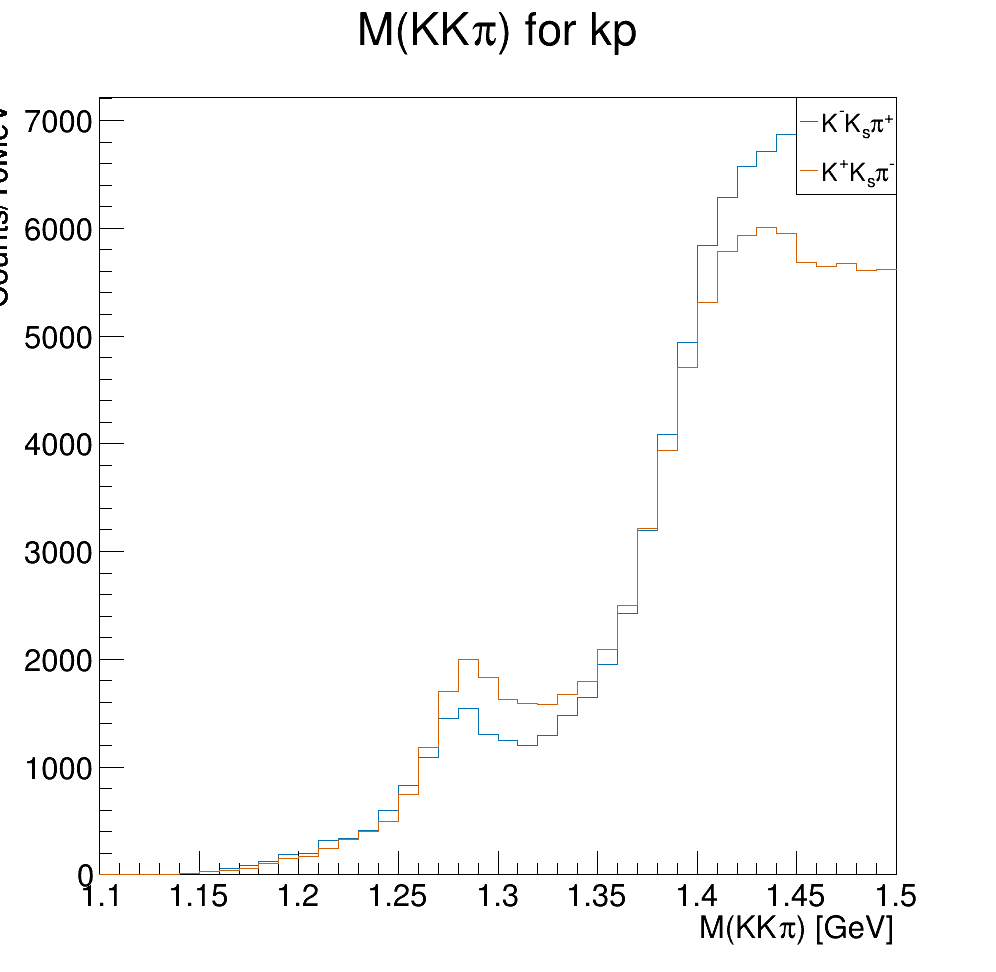

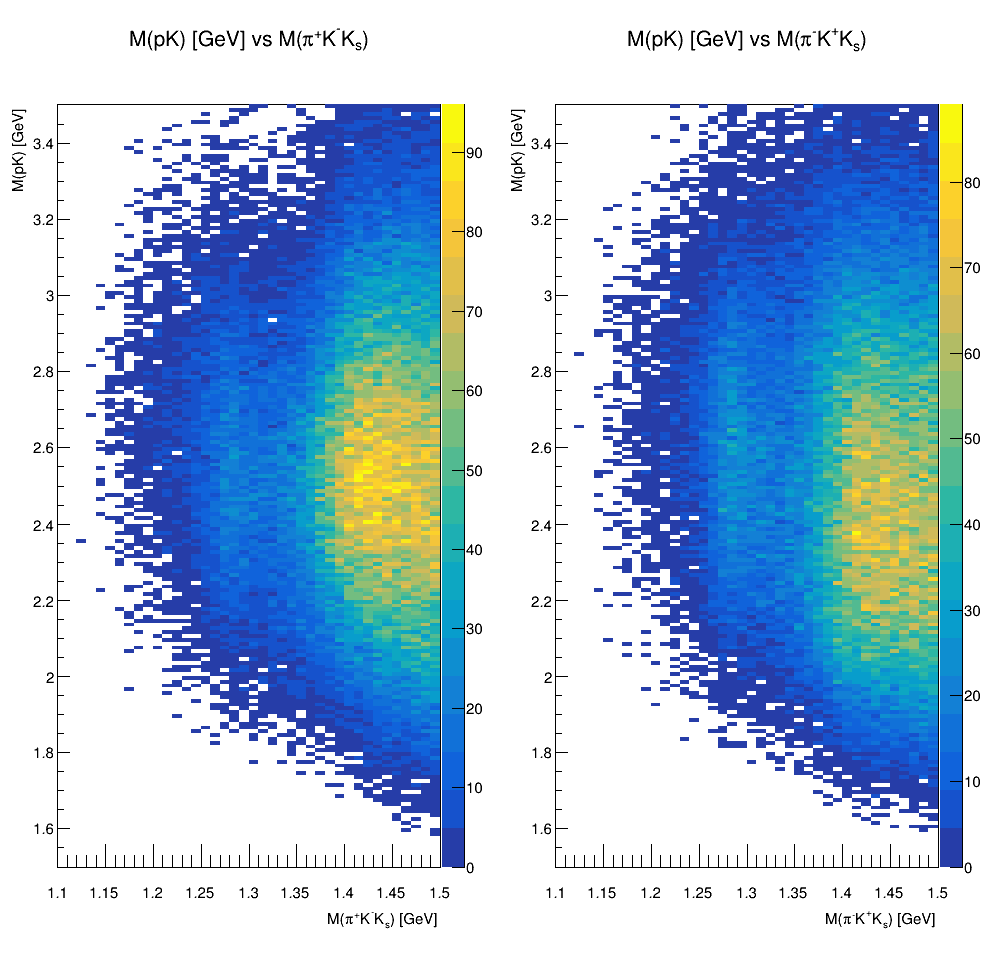

In [27]:
print(f'n kp cut pipkmks: {n_kmp_pipkmks} || pimkpks: {n_ksp_pimkpks}')
print(f'kp cut efficiency pipkmks: {n_kmp_pipkmks/n_ppi_pipkmks} || pimkpks: {n_ksp_pimkpks/n_ppi_pimkpks}')
c.cd()
hist_pipkmks_kp.Draw()
hist_pimkpks_kp.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_lambda.png')
c1.cd(1)
hist_pipkmks_vs_kp.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_kp_mirror('colz')
c1.Draw()

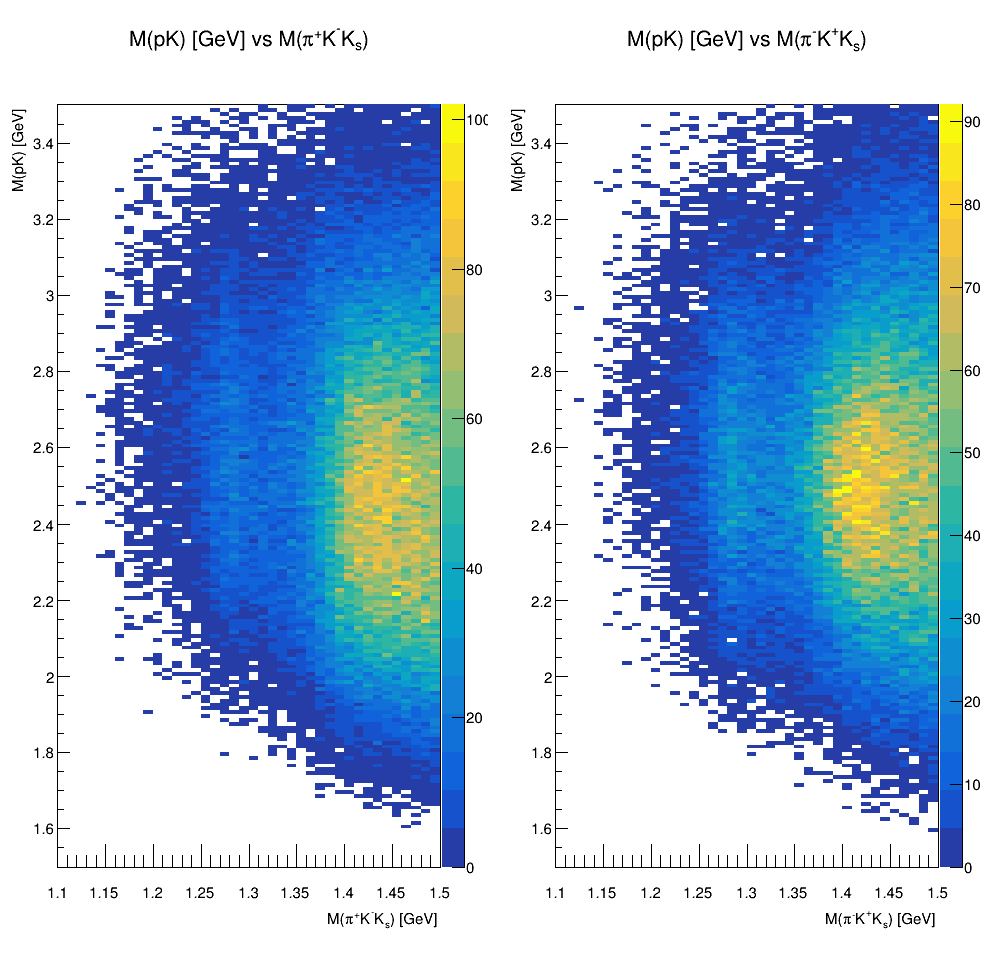

In [28]:
c1.cd(1)
hist_pipkmks_vs_kp_mirror.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_kp.Draw('colz')
c1.Draw()

## $K^*$ Rejection
### $0.8 < M(K\pi) < 1.0$ GeV

In [29]:
hist_pipkmks_vs_kstar_charged, hist_pimkpks_vs_kstar_charged = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'kstar_charged', 100, 0.6, 1.2)
hist_pipkmks_vs_kstar_neutral, hist_pimkpks_vs_kstar_neutral = make_2d_kkpi_histos(df_pipkmks, df_pimkpks, 'kstar_neutral', 100, 0.6, 1.2)

In [30]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)
n_kstar_pipkmks = df_pipkmks.Count().GetValue()
n_kstar_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kstar, hist_pimkpks_kstar = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kstar')

kstar cut pipkmks: 19576 || pimkpks: 20490
kstar efficiency: 0.20045670049254022 || pimkpks: 0.22411322694608812


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_kstar.png has been created


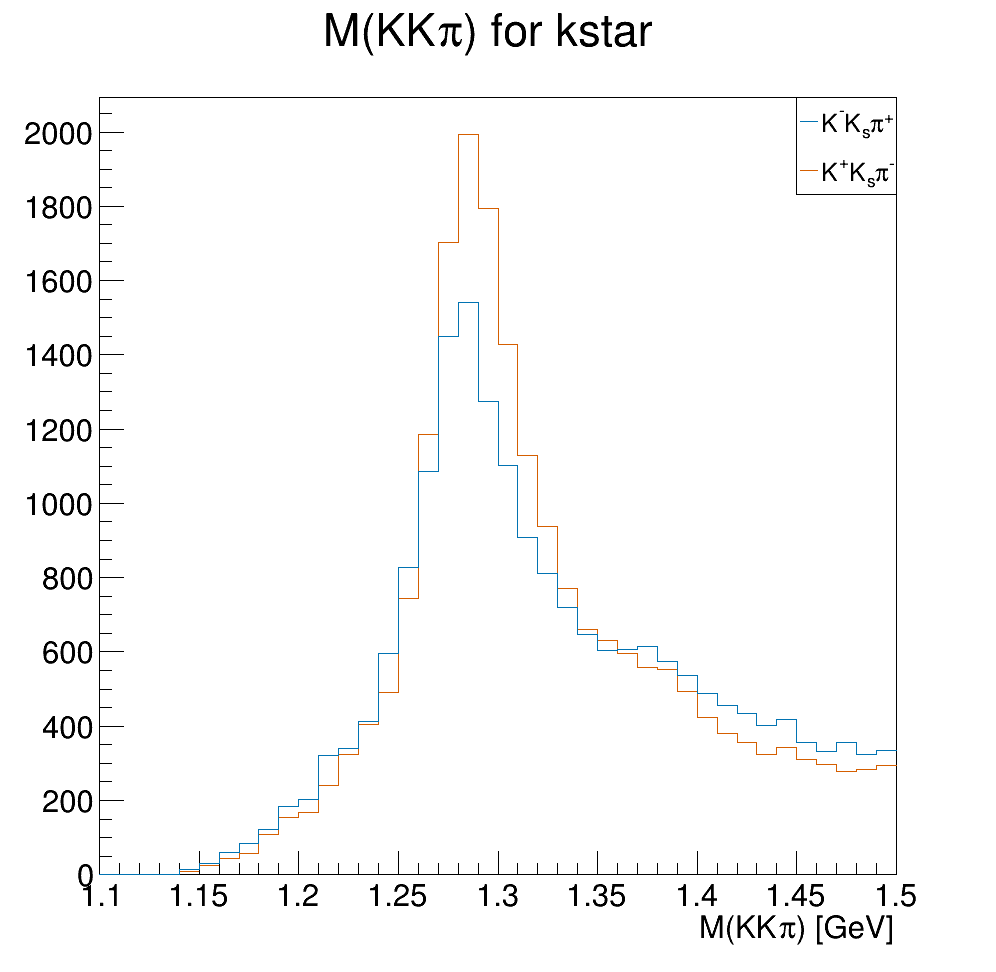

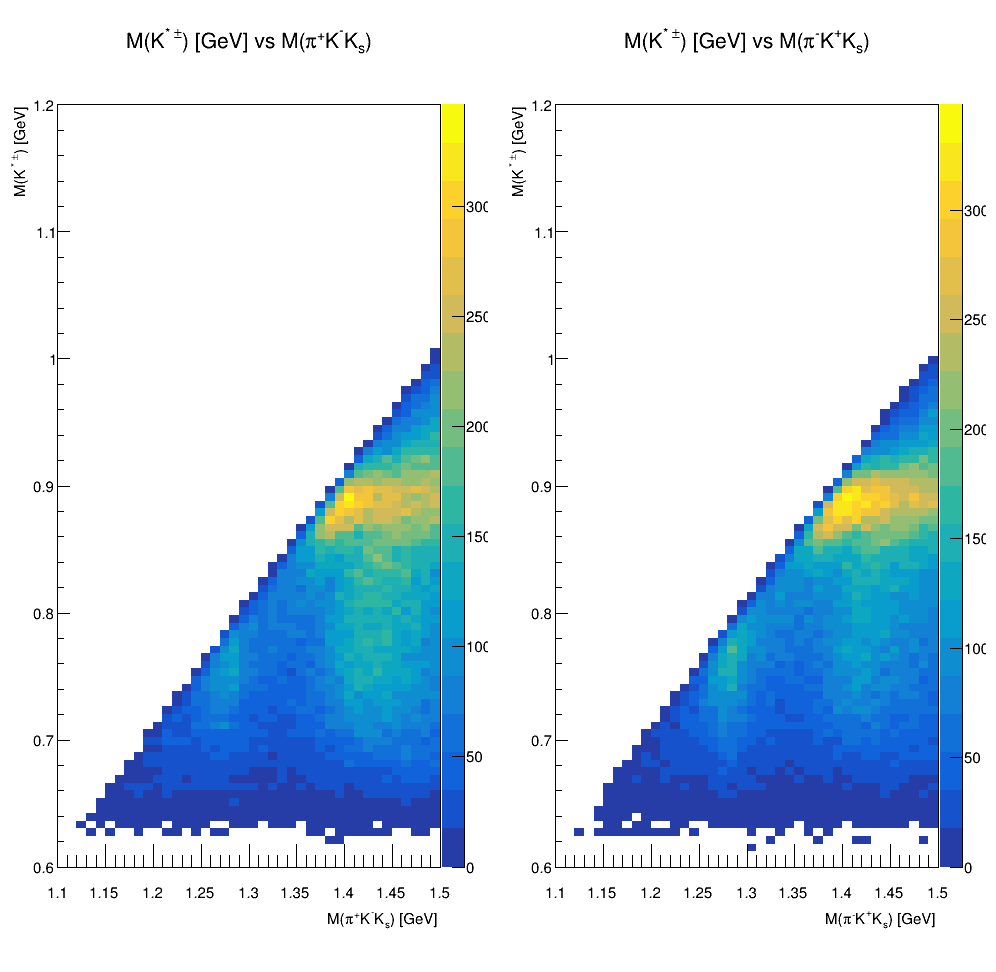

In [31]:
print(f'kstar cut pipkmks: {n_kstar_pipkmks} || pimkpks: {n_kstar_pimkpks}')
print(f'kstar efficiency: {n_kstar_pipkmks/n_kmp_pipkmks} || pimkpks: {n_kstar_pimkpks/n_ksp_pimkpks}')
c.cd()
hist_pimkpks_kstar.Draw()
hist_pipkmks_kstar.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_kstar.png')
c1.cd(1)
hist_pipkmks_vs_kstar_charged.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_kstar_charged.Draw('colz')
c1.Draw()

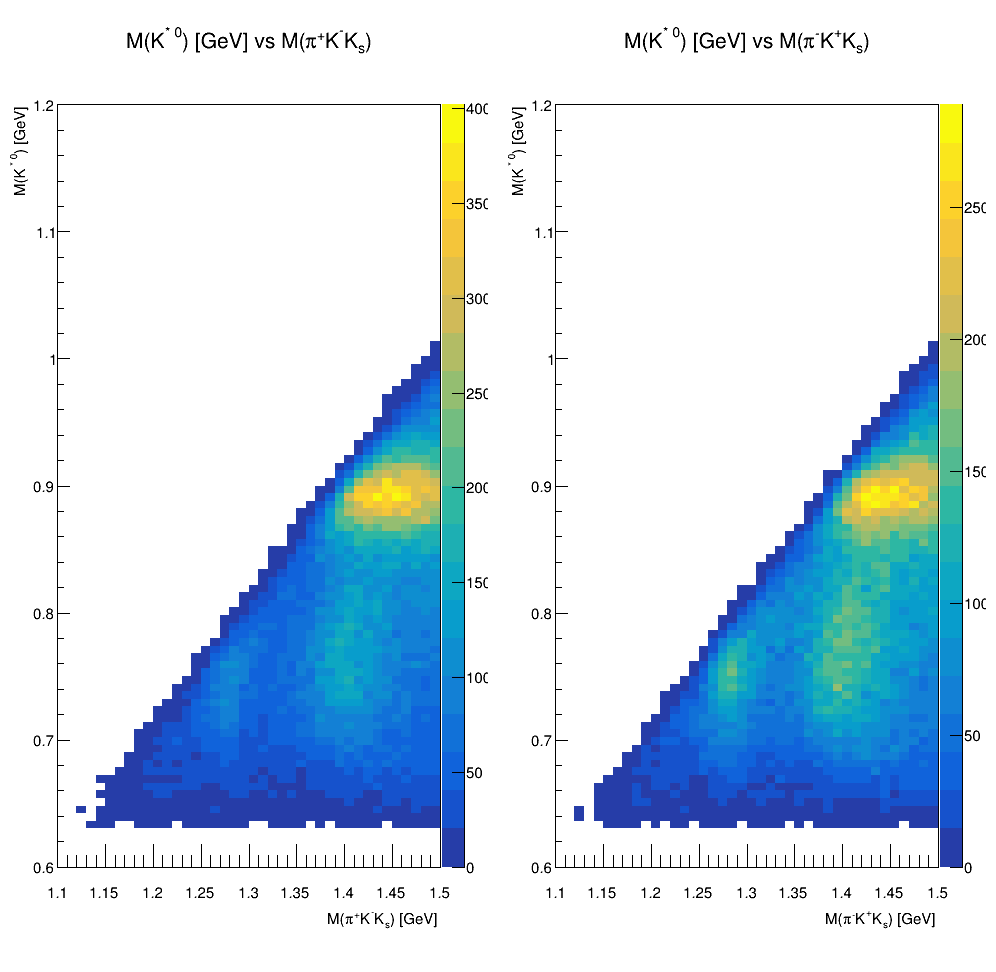

In [32]:
c1.cd(1)
hist_pipkmks_vs_kstar_neutral.Draw('colz')
c1.cd(2)
hist_pimkpks_vs_kstar_neutral.Draw('colz')
c1.Draw()

# Before/After

total efficiency pipkmks: 0.03664051269765213 || pimkpks: 0.038823950720677874


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/data_fall_kkpi_total_eff.png has been created


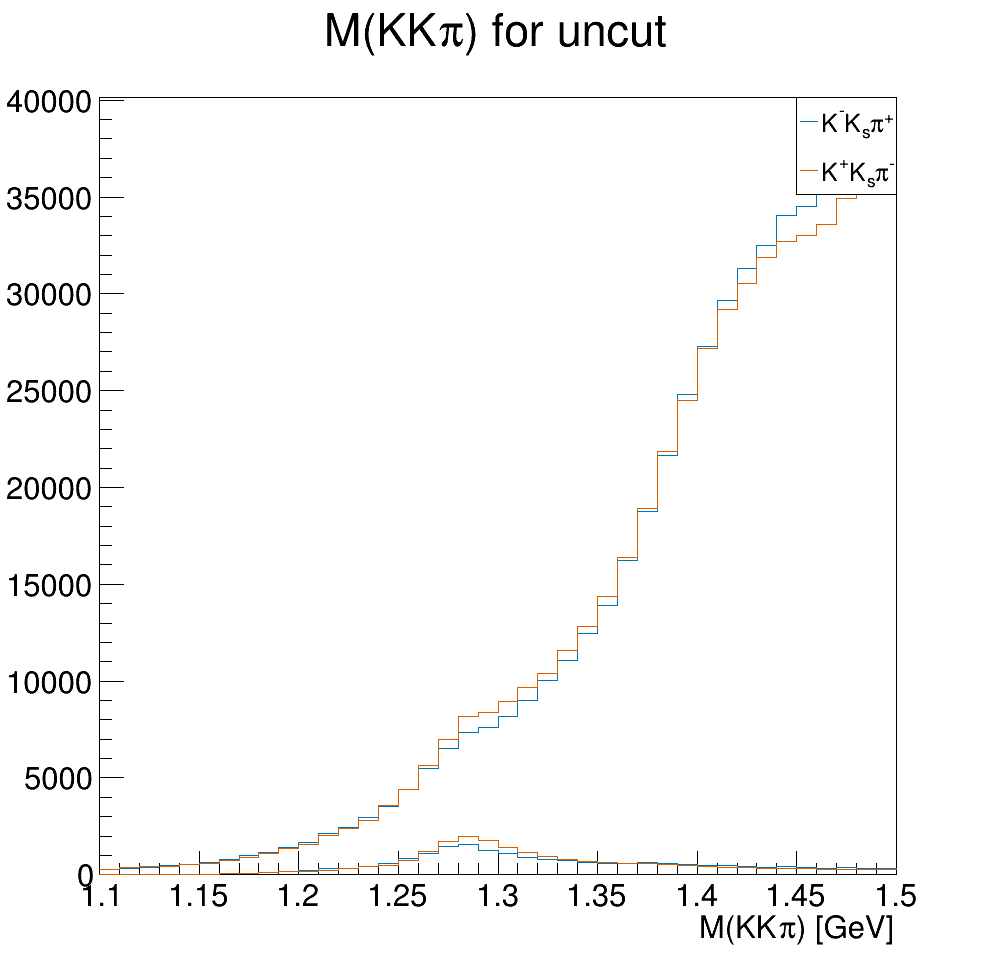

In [33]:
print(f'total efficiency pipkmks: {n_kstar_pipkmks/n_uncut_pipkmks} || pimkpks: {n_kstar_pimkpks/n_uncut_pimkpks}')
c.cd()
hist_pipkmks_uncut.Draw()
hist_pimkpks_uncut.Draw('same')
hist_pipkmks_kstar.Draw('same')
hist_pimkpks_kstar.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_total_eff.png')